## New Measure - gabapentin and pregabalin mg

In [66]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps

In [59]:
sql = """
select pct, datetime(month) as month,'gabapentin' as drug,
SUM(CASE WHEN bnf_code  like '0408010G0AAAAAA' THEN quantity *(100/60) 
WHEN bnf_code like '0408010G0AAABAB' THEN quantity *300 --Gabapentin_Cap 300mg (brands and generic)
WHEN bnf_code like '0408010G0AAACAC' THEN quantity *400 --Gabapentin_Cap 400mg (brands and generic)
WHEN bnf_code like '0408010G0AAADAD' THEN quantity *50 --Gabapentin_Pdrs 50mg (brands and generic)
WHEN bnf_code like '0408010G0AAAEAE' THEN quantity *150 --Gabapentin_Pdrs 150mg (brands and generic)
WHEN bnf_code like '0408010G0AAAFAF' THEN quantity *400 --Gabapentin_Pdrs 400mg (brands and generic)
WHEN bnf_code like '0408010G0AAAGAG' THEN quantity *20 --Gabapentin_Liq Spec 100mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AAAHAH' THEN quantity *300 --Gabapentin_Cap 300mg @gn (brands and generic)
WHEN bnf_code like '0408010G0AAAIAI' THEN quantity *240 --Gabapentin_Pdrs 240mg (brands and generic)
WHEN bnf_code like '0408010G0AAAJAJ' THEN quantity *600 --Gabapentin_Tab 600mg (brands and generic)
WHEN bnf_code like '0408010G0AAAKAK' THEN quantity *800 --Gabapentin_Tab 800mg (brands and generic)
WHEN bnf_code like '0408010G0AAALAL' THEN quantity *100 --Gabapentin_Cap 100mg @gn (brands and generic)
WHEN bnf_code like '0408010G0AAAMAM' THEN quantity *400 --Gabapentin_Cap 400mg @gn (brands and generic)
WHEN bnf_code like '0408010G0AAANAN' THEN quantity *30 --Gabapentin_Liq Spec 150mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AAAPAP' THEN quantity *60 --Gabapentin_Liq Spec 300mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AAAQAQ' THEN quantity *50 --Gabapentin_Liq Spec 250mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AAARAR' THEN quantity *90 --Gabapentin_Liq Spec 450mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AAASAS' THEN quantity *10 --Gabapentin_Liq Spec 50mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AAATAT' THEN quantity *50 --Gabapentin_Oral Soln 250mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AAAUAU' THEN quantity *50 --Gabapentin_Cap 50mg (brands and generic)
WHEN bnf_code like '0408010G0AAAVAV' THEN quantity *100 --Gabapentin_Liq Spec 500mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AAAWAW' THEN quantity *40 --Gabapentin_Liq Spec 200mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AAAYAY' THEN quantity *80 --Gabapentin_Liq Spec 400mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AAAZAZ' THEN quantity *140 --Gabapentin_Liq Spec 700mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AABABA' THEN quantity *180 --Gabapentin_Liq Spec 900mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AABBBB' THEN quantity *120 --Gabapentin_Liq Spec 600mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AABCBC' THEN quantity *160 --Gabapentin_Liq Spec 800mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AABDBD' THEN quantity *50 --Gabapentin_Oral Susp 250mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AABEBE' THEN quantity *80 --Gabapentin_Oral Soln 400mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AABFBF' THEN quantity *80 --Gabapentin_Oral Susp 400mg/5ml (brands and generic)
WHEN bnf_code like '0408010G0AABGBG' THEN quantity *50 --Gabapentin_Oral Soln 50mg/ml S/F (brands and generic)
else 0
end)/6
as pregab_mg
from `hscic.normalised_prescribing_standard` 
where bnf_code like '0408010G0%'
group by pct, month, drug

union all

select pct, datetime(month) as month, 'pregabalin' as drug, sum(lyrica_mg) as pregab_mg
from measures.pregabalin_total_mg
group by pct, month, drug
"""
gaba_df = bq.cached_read(sql, csv_path='cmpa_df.csv')
#gaba_df['month'] = gaba_df['month'].astype('datetime64[ns]')

In [60]:
gaba_df.head()

,pct,month,drug,pregab_mg
0,06Q,2012-01-01,gabapentin,4.696392e+06
1,08W,2012-01-01,gabapentin,1.949859e+06
2,01E,2012-01-01,gabapentin,3.564078e+06
3,11D,2012-01-01,gabapentin,2.000000e+04
4,07J,2012-01-01,gabapentin,4.192378e+06


In [32]:
gaba_gp_df=gaba_df.groupby(['pct_id','month'])[['pregab_mg']].sum.plot(kind='line', title="Total cost of CMPA prescribing")

AttributeError: 'function' object has no attribute 'plot'

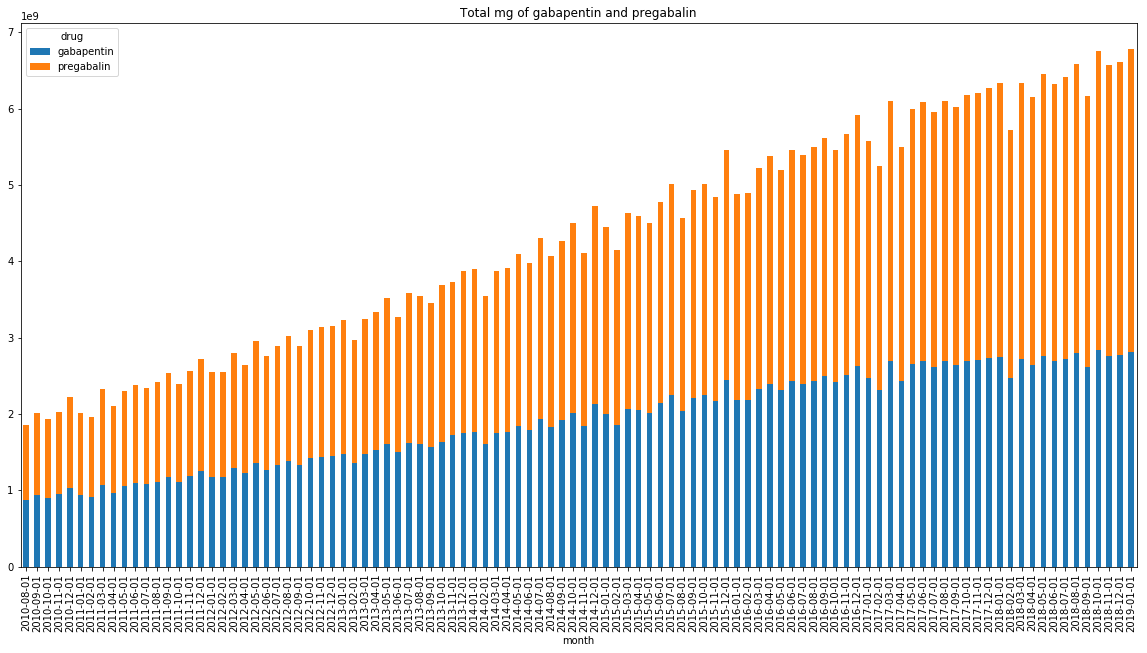

In [65]:
gaba_df.groupby(['month','drug'])['pregab_mg'].sum().unstack().fillna(0).plot.bar(stacked=True, title="Total mg of gabapentin and pregabalin",figsize=(20,10))

In [48]:
xtab_df=pd.crosstab(gaba_df.month,gaba_df.drug)

In [49]:
xtab_df.head()

drug,gabapentin,pregabalin
month,,
2010-08-01,255,244
2010-09-01,256,246
2010-10-01,251,244
2010-11-01,262,252
2010-12-01,258,254
